In [2]:


# Open and read the file
with open("D:\\Downloads\\1stAlpha1_Platform.txt", 'r') as file:
    content = file.read()

# Print the content of the file
content


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Downloads\\1stAlpha1_Platform.txt'

In [1]:
import pandas as pd

# Define the path to your file
file_path = "/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/Alpha11_Platform.txt"

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# The first line contains the headers
headers = lines[0].strip().split(',')

# The remaining lines contain the data
data = []
for line in lines[2:]:
    data.append(line.strip().split(','))

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Convert numeric columns to the appropriate data types
df = df.apply(pd.to_numeric, errors='ignore')

# Display the DataFrame
print(df)


     Time_Step  Frame  Platform_LocX  Platform_LocY  Platform_LocZ  \
0     0.033333      2       0.460862     -29.353893      -0.065447   
1     0.050000      3       0.460862     -29.353893      -0.065447   
2     0.066667      4       0.460862     -29.353893      -0.065447   
3     0.083333      5       0.460862     -29.353893      -0.065447   
4     0.100000      6       0.460862     -29.353893      -0.065447   
..         ...    ...            ...            ...            ...   
994  16.600000    996       0.460862     -29.353893      -0.065447   
995  16.616667    997       0.460862     -29.353893      -0.065447   
996  16.633333    998       0.460862     -29.353893      -0.065447   
997  16.650000    999       0.460862     -29.353893      -0.065447   
998  16.666667   1000       0.460862     -29.353893      -0.065447   

     Platform_RotX  Platform_RotY  Platform_RotZ  Platform_Marker1_LocX  \
0         0.023042       0.002885       -2.09354              -0.742917   
1        

In [2]:
frames = df['Frame']

In [3]:
frames = list(frames)

In [4]:
df.columns

Index(['Time_Step', 'Frame', 'Platform_LocX', 'Platform_LocY', 'Platform_LocZ',
       'Platform_RotX', 'Platform_RotY', 'Platform_RotZ',
       'Platform_Marker1_LocX', 'Platform_Marker1_LocY',
       'Platform_Marker1_LocZ', 'Platform_Marker1_RotX',
       'Platform_Marker1_RotY', 'Platform_Marker1_RotZ',
       'Platform_Marker2_LocX', 'Platform_Marker2_LocY',
       'Platform_Marker2_LocZ', 'Platform_Marker2_RotX',
       'Platform_Marker2_RotY', 'Platform_Marker2_RotZ',
       'Platform_Marker3_LocX', 'Platform_Marker3_LocY',
       'Platform_Marker3_LocZ', 'Platform_Marker3_RotX',
       'Platform_Marker3_RotY', 'Platform_Marker3_RotZ', 'Windmill_Base_LocX',
       'Windmill_Base_LocY', 'Windmill_Base_LocZ', 'Windmill_Base_RotX',
       'Windmill_Base_RotY', 'Windmill_Base_RotZ', 'Pole_Marker_LocX',
       'Pole_Marker_LocY', 'Pole_Marker_LocZ', 'Pole_Marker_RotX',
       'Pole_Marker_RotY', 'Pole_Marker_RotZ', 'Empty_RotY',
       'Empty_RotY_Speed', 'Empty_RotY_Angle', 'Blade_M

In [16]:
import cv2

def extract_frames_by_number(video_path, frame_numbers):
  """
  Extracts frames from a video based on a list of frame numbers.

  Args:
      video_path (str): Path to the input video file.
      frame_numbers (list): List of integers representing frame numbers to extract.
  """
  cap = cv2.VideoCapture(video_path)

  # Get video properties (optional, for informative naming)
  fps = cap.get(cv2.CAP_PROP_FPS)
  frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

  success, image = None, None
  extracted_frames = 0

  for frame_number in frame_numbers:
    # Handle invalid frame numbers
    if frame_number < 0 or frame_number >= frame_count:
      print(f"Warning: Frame number {frame_number} is out of range. Skipping.")
      continue

    # Set frame position accurately
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    success, image = cap.read()

    if success:
      # Construct filename based on frame number (optional)
      filename = f"/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_{frame_number:05d}.jpg"
      cv2.imwrite(filename, image)
      print(f"Frame {frame_number} extracted and saved as {filename}")
      extracted_frames += 1
    else:
      print(f"Error reading frame number {frame_number}")

  cap.release()

  if extracted_frames == 0:
    print("No frames were successfully extracted.")

# Example usage
video_path = "/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/testing220001-1000.mp4"

extract_frames_by_number(video_path, frames)


Frame 2 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00002.jpg
Frame 3 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00003.jpg
Frame 4 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00004.jpg
Frame 5 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00005.jpg
Frame 6 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00006.jpg
Frame 7 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00007.jpg
Frame 8 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00008.jpg
Frame 9 extracted and saved as /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00009.jpg
Frame 10 extracted and saved as /scratch/jankita.scee.iitmandi/y

KeyboardInterrupt: 

In [6]:
column = list(df.columns)
columns = []
for i in column:
    if 'Marker' in i and 'Loc' in i:
        columns.append(i)
    else:
        pass
        

In [7]:
print(len(columns))

21


In [8]:
markers_loc = df[columns]
markers_loc

Platform_Marker1_LocX  Platform_Marker1_LocY  Platform_Marker1_LocZ  \
0                -0.742917             -31.112692               3.486468   
1                -0.730325             -31.106720               3.535745   
2                -0.721598             -31.101635               3.581581   
3                -0.710951             -31.095905               3.625303   
4                -0.694415             -31.088406               3.667108   
..                     ...                    ...                    ...   
994              -0.860979             -30.917755               0.977507   
995              -0.866563             -30.929512               1.018385   
996              -0.872948             -30.940907               1.060789   
997              -0.879020             -30.952482               1.104443   
998              -0.885165             -30.963985               1.149169   

     Platform_Marker2_LocX  Platform_Marker2_LocY  Platform_Marker2_LocZ  \
0                -8.651511             -20.565971               4.367522   
1                -8.637934             -20.558615               4.409029   
2                -8.628372             -20.552374               4.448442   
3                -8.616786             -20.545256               4.483820   
4                -8.599043             -20.535864               4.513344   
..                     ...                    ...                    ...   
994              -8.729860             -20.305132               0.886166   
995              -8.736155             -20.317190               0.959872   
996              -8.743369             -20.329071               1.034968   
997              -8.750374             -20.341301               1.112079   
998              -8.757556             -20.353653               1.190624   

     Platform_Marker3_LocX  Platform_Marker3_LocY  Platform_Marker3_LocZ  \
0                 6.221482             -20.537609               4.663204   
1                 6.235515             -20.529095               4.680655   
2                 6.245441             -20.521891               4.699276   
3                 6.257369             -20.513899               4.713274   
4                 6.275478             -20.503649               4.717517   
..                     ...                    ...                    ...   
994               6.119661             -20.317829               1.772550   
995               6.112621             -20.332119               1.858634   
996               6.104769             -20.346054               1.944157   
997               6.097136             -20.360321               2.031446   
998               6.089378             -20.374617               2.119183   

     Pole_Marker_LocX  ...  Pole_Marker_LocZ  Blade_Marker1_LocX  \
0           -1.143432  ...         17.642582            3.321610   
1           -1.107957  ...         17.694324           -7.115351   
2           -1.079451  ...         17.742191           -7.075053   
3           -1.048478  ...         17.788076           -6.976285   
4           -1.007922  ...         17.832523           -6.810474   
..                ...  ...               ...                 ...   
994         -1.827422  ...         15.138432           -3.842888   
995         -1.844850  ...         15.178131           -4.424662   
996         -1.861220  ...         15.219292           -4.984550   
997         -1.877044  ...         15.261529           -5.519343   
998         -1.891997  ...         15.304704           -6.023097   

     Blade_Marker1_LocY  Blade_Marker1_LocZ  Blade_Marker2_LocX  \
0            -34.026562           31.273365           -7.139756   
1            -33.440926           28.497568            0.842170   
2            -33.334293           27.986277            1.508594   
3            -33.225254           27.475584            2.149649   
4            -33.105289           26.973122            2.767802   
..                  ...                 ...    

In [13]:
import cv2
import os

def find_marker_centers(image_path):
  """
  This function takes an image path as input and returns a list of center coordinates 
  and dimensions for all detected markers (assuming black plus-shaped markers)
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale for easier processing
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to reduce noise (optional but helpful for small markers)
  blur = cv2.GaussianBlur(gray, (5, 5), 0)

  # Apply adaptive thresholding to handle uneven lighting
  thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY_INV, 11, 2)

  # Find contours in the thresholded image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Filter contours based on area and aspect ratio (assuming plus-shaped marker)
  filtered_contours = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    # Adjust these values based on your marker size and aspect ratio
    if 10 < area < 100 and 0.5 < aspect_ratio < 2:  # Adjust area and aspect ratio thresholds 
      filtered_contours.append(cnt)

  # Find centers and dimensions of all filtered contours
  marker_centers = []
  for cnt in filtered_contours:
    moment = cv2.moments(cnt)
    center_x = int(moment["m10"] / moment["m00"])
    center_y = int(moment["m01"] / moment["m00"])
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(cnt)
    marker_centers.append((0, float(center_x) / image.shape[1], float(center_y) / image.shape[0], float(w) / image.shape[1], float(h) / image.shape[0]))

  return marker_centers

# Specify the folder containing your images
image_folder = "/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker1"

# Create a separate folder to store the YOLO text files (if it doesn't exist)
yolo_folder = "/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker1"  # Name of the folder for YOLO labels
os.makedirs(yolo_folder, exist_ok=True)  # Create folder if it doesn't exist

# Loop through all images in the folder
for filename in os.listdir(image_folder):
  # Get the full path of the image
  image_path = os.path.join(image_folder, filename)

  # Check if it's an image file
  if image_path.endswith(".jpg") or image_path.endswith(".png"):
    # Find the centers of all markers
    centers = find_marker_centers(image_path)

    # Create the corresponding YOLO text file path within the separate folder
    txt_filename = os.path.join(yolo_folder, os.path.splitext(filename)[0] + ".txt")

    # Save marker data in YOLO format (if any markers found)
    if centers:
      with open(txt_filename, 'w') as f:
        for center in centers:
          f.write(f"{center[0]} {center[1]} {center[2]} {center[3]} {center[4]}\n")
    else:
      print(f"Image: {filename}, No markers found")

print("Marker centers and dimensions saved in YOLO format text files within the", yolo_folder, "folder.")

Marker centers and dimensions saved in YOLO format text files within the /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker1 folder.


In [9]:
import matplotlib.pyplot as plt
import os
import cv2

def find_marker_centers(image_path, txt_path):
  """
  This function takes an image path and corresponding text file path as input and returns 
  a list of marker bounding boxes
  """
  boxes = []
  if os.path.exists(txt_path):
    with open(txt_path, 'r') as f:
      for line in f:
        # Extract class, center coordinates, width, and height from YOLO format
        class_id, center_x, center_y, width, height = map(float, line.split())
        # Assuming normalized values, convert to image coordinates (adjust if needed)
        image = cv2.imread(image_path)
        image_h, image_w, _ = image.shape
        x_min = int((center_x - width / 2) * image_w)
        y_min = int((center_y - height / 2) * image_h)
        x_max = int((center_x + width / 2) * image_w)
        y_max = int((center_y + height / 2) * image_h)
        boxes.append((x_min, y_min, x_max, y_max))  # Use (x_min, y_min, x_max, y_max)
  else:
    print(f"Image: {image_path}, No corresponding text file found")
  return boxes

def draw_bounding_boxes(image, boxes):
  """
  This function draws bounding boxes around the provided marker information on the image
  """
  for x_min, y_min, x_max, y_max in boxes:
    # Adjust these values for desired box thickness and color
    thickness = 2
    color = (0, 0, 255)  # Blue color
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

# Specify the folder containing your images and text files
image_folder = "/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2"
yolo_folder = "/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2"  # Assuming text files are in a separate folder

# Select the image for visualization (replace with desired filename)
selected_image = "frame_00002.jpg"  # Replace with the actual image filename

# Loop through all images in the folder
for filename in os.listdir(image_folder):
  # Get the full paths of the image and corresponding text file
  image_path = os.path.join(image_folder, filename)
  txt_path = os.path.join(yolo_folder, os.path.splitext(filename)[0] + ".txt")

  # Check if it's an image file
  if image_path.endswith(".jpg") or image_path.endswith(".png"):
    # Find bounding boxes from the text file (if it exists)
    

    # Check if selected image matches the current filename
    if filename == selected_image:
      print("FOUND")
      boxes = find_marker_centers(image_path, txt_path)
      # Read the image for visualization
      image = cv2.imread(image_path)

      # Draw bounding boxes around markers (if any)
      if boxes:
        
        draw_bounding_boxes(image, boxes)  # Show only the first bounding box
        # Display the image with the first bounding box
        plt.imshow(image)
        plt.title("Image with Bounding Box")
        plt.axis('off')  # Hide the x and y axes
        plt.show() # Wait for a key press to close the window
      else:
        print(f"Image: {filename}, No bounding boxes found in text file")

      # Close the window after processing the selected image
    #   cv2.destroyAllWindows()
      break  # Exit the loop after processing the selected image

print("Finished processing images and visualizing the first bounding box on the selected image.")


FOUND
Image: /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/frame_00002.jpg, No corresponding text file found
Image: frame_00002.jpg, No bounding boxes found in text file
Finished processing images and visualizing the first bounding box on the selected image.


In [28]:
# import cv2
# import numpy as np
# import os

# def find_black_marker_centers(image_path, num_markers=7):
#     # Read the image
#     image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#     if image is None:
#         return None, None
    
#     # Get image dimensions
#     h, w = image.shape[:2]
    
#     # Convert the image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Threshold the image to get only black colors
#     _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    
#     # Find contours
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # Sort contours by area and select the top `num_markers` contours
#     contours = sorted(contours, key=cv2.contourArea, reverse=True)[:num_markers]
    
#     centers = []
#     for cnt in contours:
#         # Calculate moments for each contour
#         M = cv2.moments(cnt)
        
#         if M["m00"] != 0:
#             # Calculate x, y coordinate of center
#             cX = int(M["m10"] / M["m00"])
#             cY = int(M["m01"] / M["m00"])
#             # Assume a small fixed width and height since we only know the center
#             box_w, box_h = 30, 30  # Example fixed size
#             centers.append((cX, cY, box_w, box_h))
    
#     return centers, (w, h)

# def save_yolo_labels(centers, image_size, label_path):
#     w_img, h_img = image_size
#     with open(label_path, 'w') as file:
#         for (cX, cY, box_w, box_h) in centers:
#             # Normalize coordinates
#             x_center = cX / w_img
#             y_center = cY / h_img
#             width = box_w / w_img
#             height = box_h / h_img
#             file.write(f"0 {x_center} {y_center} {width} {height}\n")

# def process_images_in_folder(folder_path, output_folder):
#     # Create output folder if it doesn't exist
#     os.makedirs(output_folder, exist_ok=True)
    
#     # List all files in the folder
#     files = os.listdir(folder_path)
#     image_files = [f for f in files if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))]
    
#     for image_file in image_files:
#         image_path = os.path.join(folder_path, image_file)
#         centers, image_size = find_black_marker_centers(image_path)
#         if centers:
#             label_file = os.path.splitext(image_file)[0] + '.txt'
#             label_path = os.path.join(output_folder, label_file)
#             save_yolo_labels(centers, image_size, label_path)

# # Example usage
# input_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker1'
# output_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker1'
# process_images_in_folder(input_folder, output_folder)

import cv2
import numpy as np
import os

def find_black_marker_centers(image_path, num_markers=7):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        return None, None
    
    # Get image dimensions
    h, w = image.shape[:2]
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to get only black colors
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area and select the top num_markers contours
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:num_markers]
    
    centers = []
    for cnt in contours:
        # Calculate moments for each contour
        M = cv2.moments(cnt)
        
        if M["m00"] != 0:
            # Calculate x, y coordinate of center
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Assume a small fixed width and height since we only know the center
            box_w, box_h = 30, 30  # Example fixed size
            centers.append((cX, cY, box_w, box_h))
    
    # Merge overlapping boxes
    merged_centers = merge_overlapping_boxes(centers)
    
    return merged_centers, (w, h)

def merge_overlapping_boxes(boxes):
    merged_boxes = []
    while boxes:
        current = boxes.pop(0)
        merged = False
        for i in range(len(merged_boxes)):
            if boxes_overlap(current, merged_boxes[i]):
                merged_boxes[i] = merge_boxes(current, merged_boxes[i])
                merged = True
                break
        if not merged:
            merged_boxes.append(current)
    return merged_boxes

def boxes_overlap(box1, box2):
    # Calculate the coordinates of the corners of the boxes
    x1_min, x1_max = box1[0] - box1[2] / 2, box1[0] + box1[2] / 2
    y1_min, y1_max = box1[1] - box1[3] / 2, box1[1] + box1[3] / 2
    x2_min, x2_max = box2[0] - box2[2] / 2, box2[0] + box2[2] / 2
    y2_min, y2_max = box2[1] - box2[3] / 2, box2[1] + box2[3] / 2
    
    # Check if the boxes overlap
    return x1_min < x2_max and x1_max > x2_min and y1_min < y2_max and y1_max > y2_min

def merge_boxes(box1, box2):
    # Calculate the coordinates of the new merged box
    x_min = min(box1[0] - box1[2] / 2, box2[0] - box2[2] / 2)
    x_max = max(box1[0] + box1[2] / 2, box2[0] + box2[2] / 2)
    y_min = min(box1[1] - box1[3] / 2, box2[1] - box2[3] / 2)
    y_max = max(box1[1] + box1[3] / 2, box2[1] + box2[3] / 2)
    
    # Create the merged box
    new_cX = (x_min + x_max) / 2
    new_cY = (y_min + y_max) / 2
    new_w = x_max - x_min
    new_h = y_max - y_min
    
    return (new_cX, new_cY, new_w, new_h)

def save_yolo_labels(centers, image_size, label_path):
    w_img, h_img = image_size
    with open(label_path, 'w') as file:
        for (cX, cY, box_w, box_h) in centers:
            # Normalize coordinates
            x_center = cX / w_img
            y_center = cY / h_img
            width = box_w / w_img
            height = box_h / h_img
            file.write(f"0 {x_center} {y_center} {width} {height}\n")

def process_images_in_folder(folder_path, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # List all files in the folder
    files = os.listdir(folder_path)
    image_files = [f for f in files if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))]
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        centers, image_size = find_black_marker_centers(image_path)
        if centers:
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(output_folder, label_file)
            save_yolo_labels(centers, image_size, label_path)

# Example usage
input_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2'
output_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2'
process_images_in_folder(input_folder, output_folder)


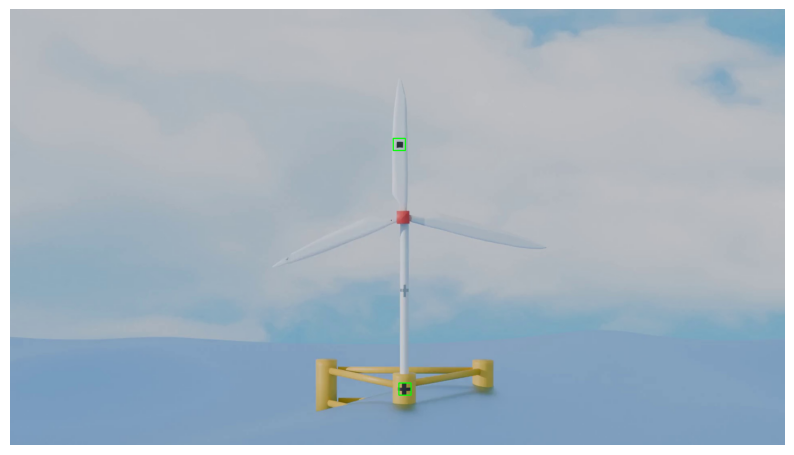

In [24]:
import cv2
import os
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, label_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return
    
    # Get image dimensions
    h, w = image.shape[:2]
    
    # Read the YOLO label file
    with open(label_path, 'r') as file:
        labels = file.readlines()
    
    # Draw bounding boxes
    for label in labels:
        parts = label.strip().split()
        class_id = int(parts[0])
        x_center = float(parts[1]) * w
        y_center = float(parts[2]) * h
        width = float(parts[3]) * w
        height = float(parts[4]) * h
        
        # Calculate the coordinates of the top-left corner
        top_left_x = int(x_center - width / 2)
        top_left_y = int(y_center - height / 2)
        bottom_right_x = int(x_center + width / 2)
        bottom_right_y = int(y_center + height / 2)
        
        # Draw the rectangle on the image
        cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
    
    # Convert BGR image to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2/marker2_frame_00002.jpg'
label_path = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2/marker2_frame_00002.txt'
draw_bounding_boxes(image_path, label_path)


In [27]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(images_folder, labels_folder, output_folder, val_ratio=0.2):
    # Create output directories
    train_images_dir = os.path.join(output_folder, 'train', 'images')
    val_images_dir = os.path.join(output_folder, 'val', 'images')
    train_labels_dir = os.path.join(output_folder, 'train', 'labels')
    val_labels_dir = os.path.join(output_folder, 'val', 'labels')
    os.makedirs(train_images_dir, exist_ok=True)
    os.makedirs(val_images_dir, exist_ok=True)
    os.makedirs(train_labels_dir, exist_ok=True)
    os.makedirs(val_labels_dir, exist_ok=True)
    
    # List all image files and corresponding label files
    image_files = [f for f in os.listdir(images_folder) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))]
    label_files = [os.path.splitext(f)[0] + '.txt' for f in image_files]

    # Split the dataset into training and validation sets
    train_images, val_images, train_labels, val_labels = train_test_split(
        image_files, label_files, test_size=val_ratio, random_state=42)
    
    # Move files to the appropriate directories
    for img_file, lbl_file in zip(train_images, train_labels):
        shutil.copy(os.path.join(images_folder, img_file), os.path.join(train_images_dir, img_file))
        shutil.copy(os.path.join(labels_folder, lbl_file), os.path.join(train_labels_dir, lbl_file))
    
    for img_file, lbl_file in zip(val_images, val_labels):
        shutil.copy(os.path.join(images_folder, img_file), os.path.join(val_images_dir, img_file))
        shutil.copy(os.path.join(labels_folder, lbl_file), os.path.join(val_labels_dir, lbl_file))
    
    # Create train.txt and val.txt files with absolute paths
    with open(os.path.join(output_folder, 'train.txt'), 'w') as train_file:
        for img_file in train_images:
            train_file.write(f"{os.path.abspath(os.path.join(train_images_dir,img_file))}\n")
    
    with open(os.path.join(output_folder, 'val.txt'), 'w') as val_file:
        for img_file in val_images:
            val_file.write(f"{os.path.abspath(os.path.join(val_images_dir, img_file))}\n")


# Example usage
images_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/marker2'
labels_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2'
output_folder = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/Data'
split_dataset(images_folder, labels_folder, output_folder)



FileNotFoundError: [Errno 2] No such file or directory: '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2/marker2_frame_00109.txt'

In [20]:
# '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2/marker2_frame_00109.txt
#  /scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker2/marker2_frame_00002.txt
file_name = '/scratch/jankita.scee.iitmandi/yolo/datasets/new_data/labels_marker1/frame_00462.txt'
with open(file_name, 'r') as file:
    # Read the contents of the file
    content = file.read()
    print(content)

0 0.5078125 0.8425925925925926 0.015625 0.027777777777777776
0 0.5052083333333334 0.47962962962962963 0.017708333333333333 0.04814814814814815

